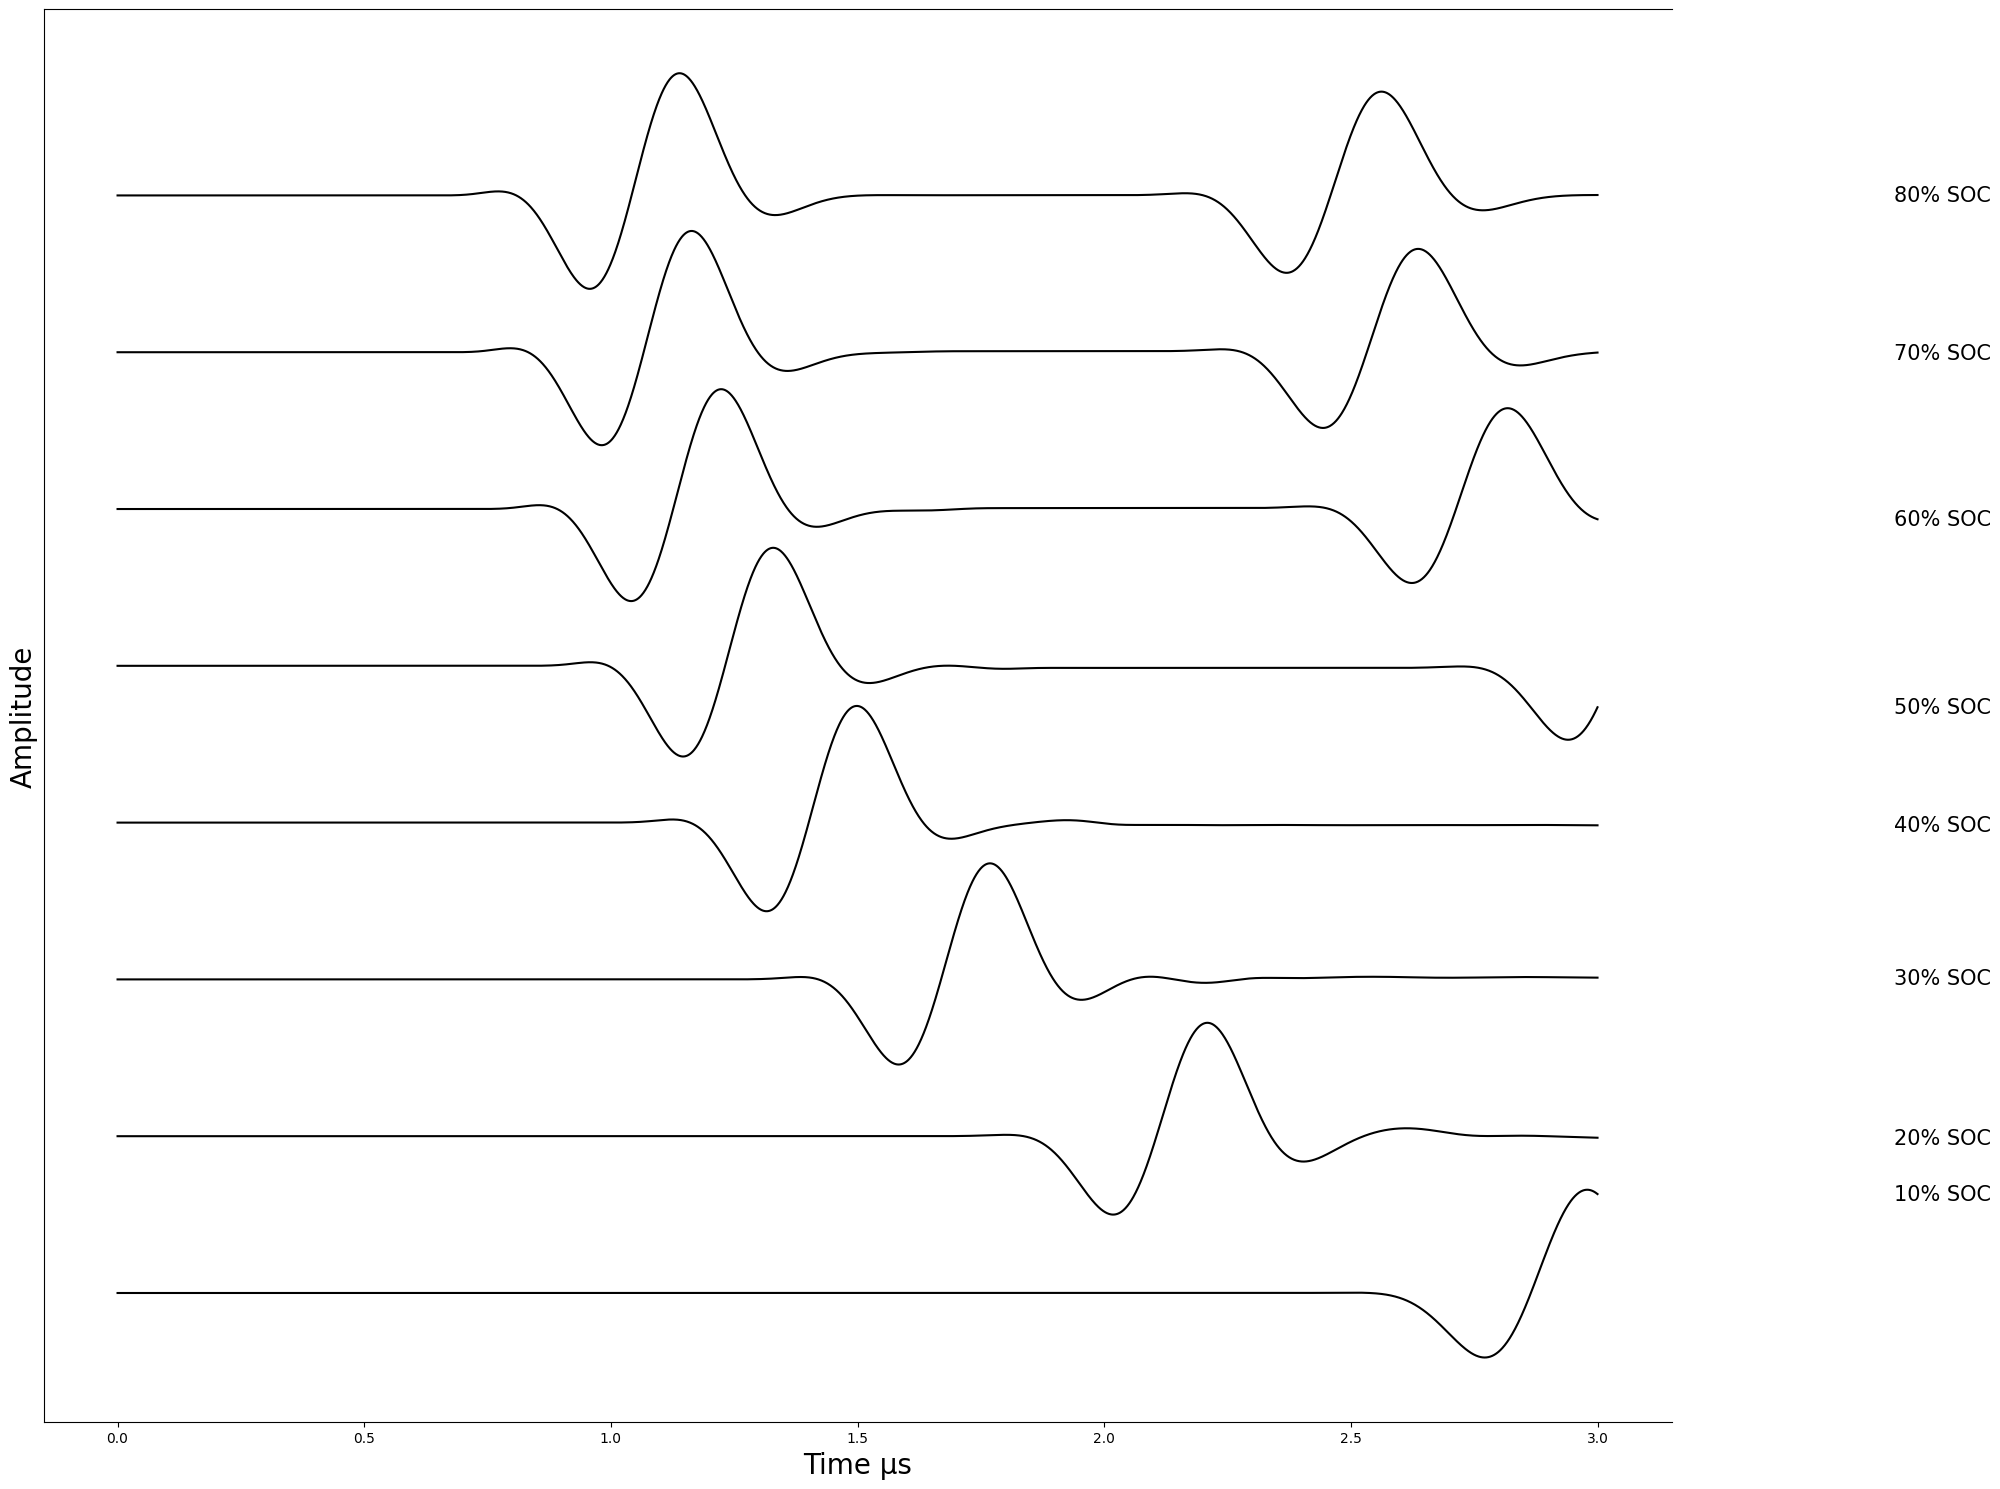

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_npy_files(directory):
    # Get all .npy files in the directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort files alphabetically (optional)
    
    num_files = len(npy_files)
    num_subplots = min(num_files, 11)  # Maximum 11 plots
    
    if num_files == 0:
        print("No .npy files found in the directory.")
        return
    
    fig, ax = plt.subplots(figsize=(20, 15))  # Adjusted for a tall layout
    
    soc_labels = np.linspace(10, 80, num_subplots)  # Generate SOC labels from 0% to 100%
    offset = 1.5  # Vertical offset between lines
    
    for i, file in enumerate(npy_files[:11]):
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        
        if data.ndim < 2:
            print(f"Skipping {file}: Not a 2D array.")
            continue
        
        last_column = data[-1,:]  # Extract last column
        x_values = np.arange(len(last_column)) * 1e-3  # Adjust x-axis scale
        
        ax.plot(x_values, last_column + i * offset, color='black')  # Offset each line
        
        # Add text label to the right side
        ax.text(x_values[-1] + 0.2 * (x_values[-1] - x_values[0]), 
                last_column[-1] + i * offset, 
                f"{int(soc_labels[i])}% SOC", 
                verticalalignment='center', fontsize=15)
    
    ax.set_xlabel(("Time "u"\u03bcs"), fontsize=20)
    ax.set_ylabel("Amplitude", fontsize=20)
    ax.set_yticks([])  # Remove y-ticks
    ax.spines['left'].set_visible(True)  # Hide left spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    
    plt.tight_layout()
    plt.show()

    # Example usage
plot_npy_files("./")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_npy_files(directory):
    # Get all .npy files in the directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort files alphabetically (optional)
    
    num_files = len(npy_files)
    num_subplots = min(num_files, 11)  # Ensure we don't exceed 11 subplots
    
    if num_files == 0:
        print("No .npy files found in the directory.")
        return
    
    fig, axes = plt.subplots(num_subplots, 1, figsize=(7,10 * num_subplots), sharex=True)
    
    if num_subplots == 1:
        axes = [axes]  # Ensure axes is iterable
    
    soc_labels = np.linspace(0, 100, num_subplots)  # Generate SOC labels from 0% to 100%
    
    for i, file in enumerate(npy_files[:11]):
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        
        if data.ndim < 2:
            print(f"Skipping {file}: Not a 2D array.")
            continue
        
        last_column = data[-1,:3000]  # Extract last column
        x_values = np.arange(len(last_column)) * 1e-3  # Scale x-axis
        plt.rcParams["font.family"] = "Times New Roman"
        axes[i].plot(x_values, last_column, color='black')
        axes[i].legend([f"{soc_labels[i]:.0f}% SOC"], fontsize=15)
    
    plt.xlabel("Time "u"\u03bcs")
    plt.tight_layout()
    plt.show()


# Example usage
plot_npy_files("./")